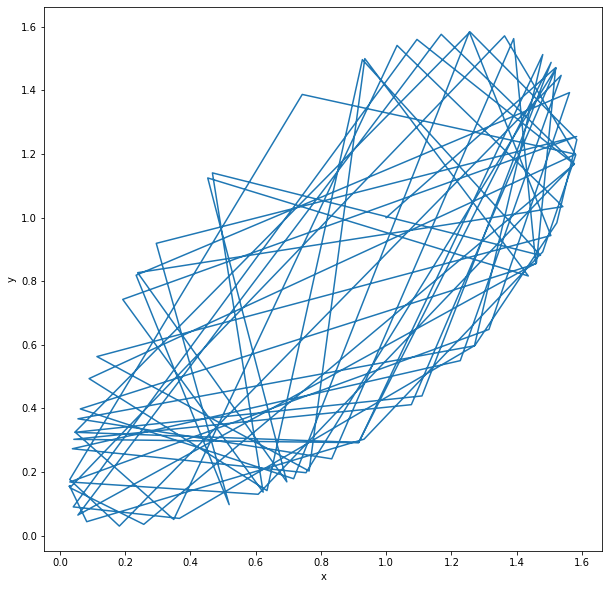

In [135]:
import numpy as np
import matplotlib.pyplot as plt
def f(s,x1,y1,vx,vy):
    return -((x1+s*vx)**3+(y1+s*vy)**3) +3*(x1+s*vx)*(y1+s*vy)-0.01

def df(s,x1,y1,vx,vy):
    return -3*((x1+s*vx)**2 + (y1+s*vy)**2) + 3*(2*s*vx*vy+vy*x1+vx*y1)

def solve(s,x1,y1,vx,vy):
    c = 0
    while abs(c-s)>0.0001:
        c = s
        s = s - f(s,x1,y1,vx,vy)/df(s,x1,y1,vx,vy)
    return s
        
    
def u(x,y):
    return -(x**3 + y**3) + 3*x*y

def ux(x,y):
    return -3*x**2+3*y

def uy(x,y):
    return -3*y**3+3*x

def ff(x,y):
    return np.sqrt(ux(x,y)**2 + uy(x,y)**2)

def fxn(x,y):
    return ux(x,y)/ff(x,y)

def fyn (x,y):
    return uy(x,y)/ff(x,y)

def refl(x1,y1,vx1,vy1):
    vN = vx1*fxn(x1,y1) + vy1*fyn(x1,y1)
    vL = -vx1*fyn(x1,y1) + vy1*fxn(x1,y1)
    vx = -vN*fxn(x1,y1) - vL*fyn(x1,y1)
    vy = -vN*fyn(x1,y1) + vL*fxn(x1,y1)
    v = [vx, vy]
    return v
    
def step(x0,y0,vx,vy,h,J):
    x1 = x0 + h*vx
    y1 = y0 + h*vy
    u1 = u(x1,y1)
    x2 = x1 + h*vx
    y2 = y1 + h*vy
    u2 = u(x2,y2)
    while u1*u2>0:
        x2 = x1 + h*vx
        y2 = y1 + h*vy
        u2 = u(x2,y2)
        x1 = x2
        y1 = y2
    s = 0.009
    s1 = solve(s,x1,y1,vx,vy)
    x3 = x1 + s1*vx
    y3 = y1 + s1*vy    
    z0 = x3
    z1 = y3
    z = [z0,z1]
    return z

def trj(x1,y1,vx1,vy1,h,J,M):
    w = np.zeros((M+1,4))
    w[0,0] = x1
    w[0,1] = y1
    w[0,2] = vx1
    w[0,3] = vy1
    for m in range(1,M+1):
        z = step(x1,y1,vx1,vy1,h,J)
        x1 = z[0]
        y1 = z[1]
        V2 = refl(x1,y1,vx1,vy1)
        vx1 = V2[0]
        vy1 = V2[1]
        w[m,0] = x1 + vx1*0.0005
        w[m,1] = y1 + vy1*0.0005
        w[m,2] = vx1
        w[m,3] = vy1
    x = np.zeros(M)
    y = np.zeros(M)
    for i in range(M):
        x[i] = w[i,0]
        y[i] = w[i,1]
    plt.figure(figsize=(10, 10))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x, y)

x1 = 1.
y1 = 1.
vx1 = 1.1
vy1 = 1.
h = 0.01
J = 1000
M = 100
trj(x1,y1,vx1,vy1,h,J,M)